# Logistic regression and gradient descent basics

In [1]:
import sympy

### Define variables and functions

In [3]:
x0,x1,x2 = sympy.var('x0,x1,x2')

f = sympy.Matrix([x0**2+x1*x2, x0+x1+x2])
g = sympy.Matrix([sympy.sin(x0), x1**3+x0*x1, x2])

### Map function g on parameters of function f

In [ ]:
substitution_fg = {'x0':g[0], 'x1':g[1], 'x2':g[2]}

### Function compozition fog = f(g(x))

In [16]:
fog = f.subs(substitution_fg)

### Direct Jacobian matrix

In [18]:
Jfog = fog.jacobian([x0,x1,x2])
Jfog.simplify()
sympy.pprint(Jfog)

⎡                      ⎛         2⎞     ⎛       2⎞⎤
⎢x₁⋅x₂ + sin(2⋅x₀)  x₂⋅⎝x₀ + 3⋅x₁ ⎠  x₁⋅⎝x₀ + x₁ ⎠⎥
⎢                                                 ⎥
⎢                              2                  ⎥
⎣  x₁ + cos(x₀)       x₀ + 3⋅x₁            1      ⎦


### Jacobian of each function

In [19]:
Jf = f.jacobian([x0,x1,x2])
Jg = g.jacobian([x0,x1,x2])

### Rule of chaining

In [21]:
Jfog2 = Jf.subs(substitution_fg)*Jg
Jfog2.simplify()
sympy.pprint(Jfog2)

⎡                      ⎛         2⎞     ⎛       2⎞⎤
⎢x₁⋅x₂ + sin(2⋅x₀)  x₂⋅⎝x₀ + 3⋅x₁ ⎠  x₁⋅⎝x₀ + x₁ ⎠⎥
⎢                                                 ⎥
⎢                              2                  ⎥
⎣  x₁ + cos(x₀)       x₀ + 3⋅x₁            1      ⎦


### Hessian matrix

In [29]:
f0 = sympy.Matrix([f[0]])
Jf0 = f0.jacobian([x0,x1,x2])

H = Jf0.jacobian([x0,x1,x2])
sympy.pprint(H)

⎡2  0  0⎤
⎢       ⎥
⎢0  0  1⎥
⎢       ⎥
⎣0  1  0⎦


## Class Random2DGaussian

In [54]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [194]:
class Random2DGaussian():
    np.random.seed(100)
    
    def __init__(self):
        self.min_x = 0
        self.max_x = 10
        self.min_y = 0
        self.max_y = 10
        
        centar_x = np.random.random_sample()
        centar_y = np.random.random_sample()
        self.mean = np.array([centar_x, centar_y])
        
        eigval_x = (np.random.random_sample()*(self.max_x - self.min_x)/5)**2
        eigval_y = (np.random.random_sample()*(self.max_y - self.min_y)/5)**2
        
        D = np.array([[eigval_x, 0], [0, eigval_y]])
        R = np.array([[45, 0], [0, 45]])
        
        self.covariance_matrix = R.T * D * R
    
    def get_sample(self, n):
        assert(n > 0)

        print 'Mean:\n', self.mean
        print '\nCovariance matrix:\n', self.covariance_matrix
        
        x, y = np.random.multivariate_normal(self.mean, self.covariance_matrix, size=n).T
        return np.column_stack((x, y))

Mean:
[ 0.55423704  0.71062943]

Covariance matrix:
[[ 3484.60732428     0.        ]
 [    0.           125.59735328]]


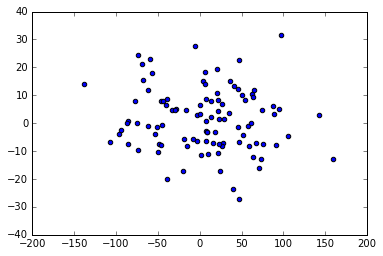

In [200]:
G = Random2DGaussian()
X = G.get_sample(100)
plt.scatter(X[:,0], X[:,1])
plt.show()